## Exercise: Discriminant Analysis and Unbalanced Datasets


In this exercise, we will use the handwritten digits data set of Scikit-learn (load_digits). Run the code below. Read the description of the data set and check a sample image. 


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

<Figure size 432x288 with 0 Axes>

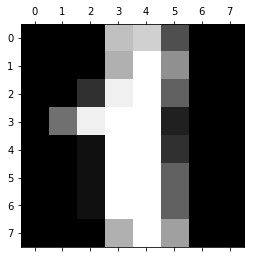

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import numpy as np


DigitsData=load_digits()
print(DigitsData.keys()) 
print(DigitsData.DESCR) #read description of the dataset
print(DigitsData.data[1])

#plot one of the images in the data
plt.gray() 
plt.matshow(DigitsData.images[1]) 
plt.show() 

#### A) Our objective is to build classfiers that identify digit 9. For this purpose, answer the following (3pts):

1) Define the target value to be equal to 1 (or True) only for digit 9, and 0 (or False) otherwise. 
    - You can define this as follows: y= (DigitsData.target == 9)



- Find how many times y is equal to 9 and how many times it is not equal to 9


COMMENT: what do you observe? Is the dataset for this classification problem balanced or not?

In [2]:
# write your code here
y = (DigitsData.target == 9)
eq = 0
neq = 0
for i in y:
    if i:
        eq += 1
    else:
        neq += 1

print('equal to 9:', eq)
print('not equal to 9:', neq)

equal to 9: 180
not equal to 9: 1617


**COMMENT**: The amount of target which is not equal to 9 is far more than that which is equal to 9. The dataset is unbalanced.

#### B) Find the accuracy of a dummy classifier (imported below) that always selects the majority class. Use the DigitsData.data as features and y (defined above) as the response. (3pts)

     - Use train_test_split with random_state= 0 for splitting the data
     - Select dummy classifier with "most frequent" strategy as follows: 
         - dummy_majority=DummyClassifier(strategy='most_frequent')


In [3]:
# write your code here
from sklearn.dummy import DummyClassifier

X_train, X_test, Y_train, Y_test = train_test_split(DigitsData.data, y, random_state=0)
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, Y_train)
print('Accuracy:', dummy_majority.score(X_test, Y_test))

Accuracy: 0.8955555555555555


#### C) Instead of a dummy classifier, use an LDA classifer (with default threshold) to solve the above classification problem. Find accuracy, confusion matrix, precision, and recall. (5pts)

- Note: you may get a warning that features are correlated (collinear). However, we can still get the performance metrics as usual

In [4]:
# write your code here

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train, Y_train)
PredictedOutput = LDAmodelFitted.predict(X_test)
print('Accuracy:', LDAmodelFitted.score(X_test, Y_test))
confusion = confusion_matrix(Y_test, PredictedOutput)
print(confusion)
print('Precision:', precision_score(Y_test, PredictedOutput))
print('Recall:', recall_score(Y_test, PredictedOutput))

Accuracy: 0.9644444444444444
[[394   9]
 [  7  40]]
Precision: 0.8163265306122449
Recall: 0.851063829787234


C:\Software\Anaconda3\envs\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### D) Use QDA classifer to perform the classification. Find accuracy, confusion matrix, precision, and recall. (5pts)
- Note: expect to see a warning that features are correlated (collinear). You can still get performance metrics.

In [5]:
# write your code here

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
PredictedOutput = QDAmodelFitted.predict(X_test)
print('Accuracy:', QDAmodelFitted.score(X_test, Y_test))
confusion = confusion_matrix(Y_test, PredictedOutput)
print(confusion)
print('Precision', precision_score(Y_test, PredictedOutput))
print('Recall', recall_score(Y_test, PredictedOutput))

Accuracy: 0.6644444444444444
[[253 150]
 [  1  46]]
Precision 0.23469387755102042
Recall 0.9787234042553191


C:\Software\Anaconda3\envs\python36\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### E) From the prediction of the QDA, plot the ROC curve. (4pts)

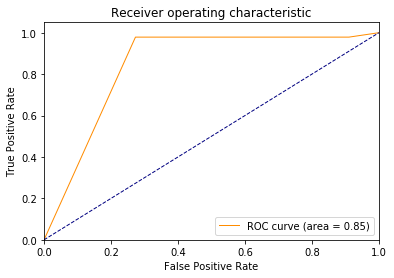

In [6]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, QDAmodelFitted.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()